## Shooting Stars Space Tech Coding Activity

Our data for this ML model comes from this website. Please take a look at it if you are interested: space-track.org 

Here we will show you how to practically use the basics of machine learning you just learned to a real world example.

With those of you familiar with a coding environment, you must first import all libraries you will use in your script.

In [1]:
import pandas

Next, we will get familiar with pandas, a special library in Python that is great for data science and manipulating large amounts of data.

A parquet file is a special serialized file that holds compresses data (to save storage space). This parquet file we are loading now has lots of data that we will use to train our machine learning model. We use the pandas library to load a parquet file into a variable called df. 

#### Note, how do we remove my local path to the parquet file? (I'm a foolish hw dev who uses linux and vim)

In [2]:
space_data = pandas.read_parquet('orbital_predict_data/physics_preds_20201023_EDITED.parquet')

After we have loaded the data from the parquete file into a local variable, we can look at some of the columns and rows listed in the data frame.

In [3]:
space_data

,epoch,aso_name,aso_id,r_x,r_y,object_type,start_epoch,start_r_x,start_r_y,elapsed_seconds,physics_pred_r_x,physics_pred_r_y,physics_err_r_x,physics_err_r_y
0,2020-09-25 16:47:28.076,COSMOS 909,10010,-1.783030e+06,-8.208743e+06,payload,2020-09-24 11:31:40.753,-1.446152e+06,-8.277359e+06,105347.322144,-1.525834e+06,-8.215337e+06,2.571959e+05,-6593.767333
1,2020-09-25 10:56:18.613,COSMOS 909,10010,-1.715884e+06,-8.223570e+06,payload,2020-09-24 11:31:40.753,-1.446152e+06,-8.277359e+06,84277.859616,-1.510850e+06,-8.231060e+06,2.050344e+05,-7490.018486
2,2020-09-28 07:13:08.987,COSMOS 909,10010,-2.490278e+06,-8.016655e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,154509.369696,-2.109646e+06,-8.042023e+06,3.806322e+05,-25367.348509
3,2020-09-27 15:36:43.765,COSMOS 909,10010,-2.315127e+06,-8.070455e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,98324.147808,-2.075787e+06,-8.093311e+06,2.393397e+05,-22856.445677
4,2020-09-27 09:45:34.306,COSMOS 909,10010,-2.249146e+06,-8.089643e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,77254.688736,-2.061879e+06,-8.109596e+06,1.872673e+05,-19952.181174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637322,2020-10-17 18:18:29.815,THORAD DELTA 1 DEB,9989,-3.690649e+06,-2.754086e+06,debris,2020-10-17 04:25:58.836,4.600393e+06,-5.966865e+04,49950.978911,-3.383725e+06,-2.701697e+06,3.069238e+05,52388.613995
637323,2020-10-22 11:58:02.084,THORAD DELTA 1 DEB,9989,3.106347e+06,-4.464325e+05,debris,2020-10-20 03:56:11.196,3.628298e+06,-3.157527e+05,201710.888064,4.759157e+06,5.157482e+05,1.652810e+06,962180.768523
637324,2020-10-22 04:14:24.131,THORAD DELTA 1 DEB,9989,3.152882e+06,-4.393782e+05,debris,2020-10-20 03:56:11.196,3.628298e+06,-3.157527e+05,173892.934944,4.594637e+06,3.821484e+05,1.441754e+06,821526.566759
637325,2020-10-21 04:50:52.869,THORAD DELTA 1 DEB,9989,6.718411e+06,1.823389e+06,debris,2020-10-20 03:56:11.196,3.628298e+06,-3.157527e+05,89681.673312,7.032861e+06,2.161258e+06,3.144500e+05,337869.246733


That's a lot of data! It will take very long to process. Instead, of dealing with 637326 rows of data, let's cut down to 1500 rows.

In [4]:
space_data = space_data.head(1500)

In [5]:
space_data

,epoch,aso_name,aso_id,r_x,r_y,object_type,start_epoch,start_r_x,start_r_y,elapsed_seconds,physics_pred_r_x,physics_pred_r_y,physics_err_r_x,physics_err_r_y
0,2020-09-25 16:47:28.076,COSMOS 909,10010,-1.783030e+06,-8.208743e+06,payload,2020-09-24 11:31:40.753,-1.446152e+06,-8.277359e+06,105347.322144,-1.525834e+06,-8.215337e+06,257195.867973,-6.593767e+03
1,2020-09-25 10:56:18.613,COSMOS 909,10010,-1.715884e+06,-8.223570e+06,payload,2020-09-24 11:31:40.753,-1.446152e+06,-8.277359e+06,84277.859616,-1.510850e+06,-8.231060e+06,205034.426574,-7.490018e+03
2,2020-09-28 07:13:08.987,COSMOS 909,10010,-2.490278e+06,-8.016655e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,154509.369696,-2.109646e+06,-8.042023e+06,380632.232860,-2.536735e+04
3,2020-09-27 15:36:43.765,COSMOS 909,10010,-2.315127e+06,-8.070455e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,98324.147808,-2.075787e+06,-8.093311e+06,239339.708986,-2.285645e+04
4,2020-09-27 09:45:34.306,COSMOS 909,10010,-2.249146e+06,-8.089643e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,77254.688736,-2.061879e+06,-8.109596e+06,187267.320122,-1.995218e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2020-10-20 11:52:01.019,DELTA 1 DEB,10227,5.177207e+06,6.053559e+06,debris,2020-10-20 11:52:01.019,5.177207e+06,6.053559e+06,0.000000,5.177207e+06,6.053559e+06,0.000000,0.000000e+00
1496,2020-09-25 15:29:47.311,DELTA 1 DEB,10229,5.979559e+06,3.807282e+06,debris,2020-09-24 01:09:21.964,5.310555e+06,4.762738e+06,138025.347839,5.264955e+06,4.749153e+06,-714604.620118,9.418712e+05
1497,2020-09-28 11:50:37.763,DELTA 1 DEB,10229,6.758378e+06,1.902806e+06,debris,2020-09-26 14:50:03.852,6.306764e+06,3.180622e+06,162033.911136,6.214195e+06,3.238132e+06,-544182.617241,1.335326e+06
1498,2020-09-27 14:10:21.148,DELTA 1 DEB,10229,6.570899e+06,2.527457e+06,debris,2020-09-26 14:50:03.852,6.306764e+06,3.180622e+06,84017.296224,6.270294e+06,3.212027e+06,-300604.667101,6.845707e+05


Looks good! How about we rename some of the columns so we better understand what they mean?
We will rename `start_r_x` to `initial_r_x` and `epoch` to `final_epoch`

You rename `start_epoch`  to `initial_epoch`, `start_r_y` to `initial_r_y`,  `r_x` to `final_r_x`, and `r_y` to `final_r_y`

In [14]:
space_data = space_data.rename(columns={'start_r_x': 'initial_r_x', 'epoch': 'final_epoch'})
space_data = space_data.rename(columns={'start_epoch': 'initial_epoch', 'start_r_y': 'initial_r_y', 'r_x': 'final_r_x', 'r_y': 'final_r_y'})
space_data

,final_epoch,aso_name,aso_id,final_r_x,final_r_y,object_type,initial_epoch,initial_r_x,initial_r_y,elapsed_seconds,physics_pred_r_x,physics_pred_r_y,physics_err_r_x,physics_err_r_y
0,2020-09-25 16:47:28.076,COSMOS 909,10010,-1.783030e+06,-8.208743e+06,payload,2020-09-24 11:31:40.753,-1.446152e+06,-8.277359e+06,105347.322144,-1.525834e+06,-8.215337e+06,257195.867973,-6.593767e+03
1,2020-09-25 10:56:18.613,COSMOS 909,10010,-1.715884e+06,-8.223570e+06,payload,2020-09-24 11:31:40.753,-1.446152e+06,-8.277359e+06,84277.859616,-1.510850e+06,-8.231060e+06,205034.426574,-7.490018e+03
2,2020-09-28 07:13:08.987,COSMOS 909,10010,-2.490278e+06,-8.016655e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,154509.369696,-2.109646e+06,-8.042023e+06,380632.232860,-2.536735e+04
3,2020-09-27 15:36:43.765,COSMOS 909,10010,-2.315127e+06,-8.070455e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,98324.147808,-2.075787e+06,-8.093311e+06,239339.708986,-2.285645e+04
4,2020-09-27 09:45:34.306,COSMOS 909,10010,-2.249146e+06,-8.089643e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,77254.688736,-2.061879e+06,-8.109596e+06,187267.320122,-1.995218e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2020-10-20 11:52:01.019,DELTA 1 DEB,10227,5.177207e+06,6.053559e+06,debris,2020-10-20 11:52:01.019,5.177207e+06,6.053559e+06,0.000000,5.177207e+06,6.053559e+06,0.000000,0.000000e+00
1496,2020-09-25 15:29:47.311,DELTA 1 DEB,10229,5.979559e+06,3.807282e+06,debris,2020-09-24 01:09:21.964,5.310555e+06,4.762738e+06,138025.347839,5.264955e+06,4.749153e+06,-714604.620118,9.418712e+05
1497,2020-09-28 11:50:37.763,DELTA 1 DEB,10229,6.758378e+06,1.902806e+06,debris,2020-09-26 14:50:03.852,6.306764e+06,3.180622e+06,162033.911136,6.214195e+06,3.238132e+06,-544182.617241,1.335326e+06
1498,2020-09-27 14:10:21.148,DELTA 1 DEB,10229,6.570899e+06,2.527457e+06,debris,2020-09-26 14:50:03.852,6.306764e+06,3.180622e+06,84017.296224,6.270294e+06,3.212027e+06,-300604.667101,6.845707e+05


Time to build a ML model. 

Step 1

Step 2

In [15]:
import os
import logging
import itertools
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [16]:
def get_state_vect_cols(prefix):
    """Get the column names of the state vector components with the
    provided `prefix`.
    :param prefix: The prefix that is used in front of the state vector
        components in the column names, examples are `physics_pred` and
        `physics_err`
    :type prefix: str
    :return: A list of the 6 names of the prefixed state vector components
    :rtype: [str]
    """
    vectors = ['r']
    components = ['x', 'y']
    col_names = [f'{prefix}_{v}_{c}'
                 for v, c
                 in itertools.product(vectors, components)]
    return col_names

In [17]:
def build_train_test_sets(df, test_size=0.2):
    # Features are the physics predicted state vectors and the amount of
    # time in seconds into the future the prediction was made
    feature_cols = ['elapsed_seconds'] + get_state_vect_cols('physics_pred') \
        + get_state_vect_cols('initial')
    # The target values are the errors between the physical model predictions
    # and the ground truth observations
    target_cols = get_state_vect_cols('physics_err')
    # Create feature and target matrices
    X = df[feature_cols]
    y = df[target_cols]
    # Split feature and target data into training and test sets
    data_keys = ['X_train', 'X_test', 'y_train', 'y_test']
    data_vals = train_test_split(X, y, test_size=test_size)
    train_test_data = dict(zip(data_keys, data_vals))
    return train_test_data

In [18]:
def eval_models(models, data):
    """Calculates the root mean squared error (RMSE) and the coefficient of
    determination (R^2) for each of the models.
    :param models: Dictionary of the error model for each state vector
        component
    :type models: {str: xgboost.XGBRegressor}
    :param data: Dictionary containing the training and test datasets
    :type data: {str: numpy.array}
    :return: Returns a DataFrame containing the evaluation metric results
    :rtype: pandas.DataFrame
    """
    evals = []
    for target_col, reg in models.items():
        y_hat = reg.predict(data['X_test'])
        y = data['y_test'][target_col]
        rmse = metrics.mean_squared_error(y, y_hat, squared=False)
        r2 = metrics.r2_score(y, y_hat)
        eval_dict = {'Error': target_col, 'RMSE': rmse, 'R^2': r2}
        evals.append(eval_dict)
    return pd.DataFrame(evals)

In [19]:
def train_models(data, params={}, eval_metric='rmse'):
    """Trains gradient boosted regression tree models to estimate the error in
    each of the six state vector components in the physical model prediction
    :param data: Dictionary containing the training and test datasets
    :type data: {str: numpy.array}
    :param params: A dictionary of parameters to pass to the XGBRegressor
        constructor
    :type params: dict
    :param eval_metric: The loss function to use in model training
    :type eval_metric: str
    :return: Dictionary containing the trained models for each state vector
        component
    :rtype: {str: xgboost.XGBRegressor}
    """
    default_params = {
        'booster': 'gbtree',
        'tree_method': 'gpu_hist',
        'gpu_id': 0
    }
    default_params.update(params)
    X, ys = data['X_train'], data['y_train']
    models = {}
    for target_col in ys.columns:
        y = ys[target_col]
        reg = xgb.XGBRegressor(**default_params)
        reg.fit(X, y, eval_metric=eval_metric)
        models[target_col] = reg
    return models

In [25]:
def plot_feat_impts(models, data):
    """Plots the feature importances for each of the error models.
    For use in an interactive jupyter session.
    :param models: Dictionary of the error model for each state vector
        component
    :type models: {str: xgboost.XGBRegressor}
    :param data: Dictionary containing the training and test datasets
    :type data: {str: numpy.array}
    """
    feat_names = data['X_train'].columns
    fig, axs = plt.subplots(2, 3, figsize=(10, 10))
    for (target_col, model), ax in zip(models.items(), axs.flat):
        feat_imp = pd.Series(model.feature_importances_, index=feat_names)
        feat_imp.sort_values(ascending=False, inplace=True)
        feat_imp.plot(kind='bar', ax=ax, title=target_col)
    plt.ylabel('Feature Importance Score')
    plt.tight_layout()

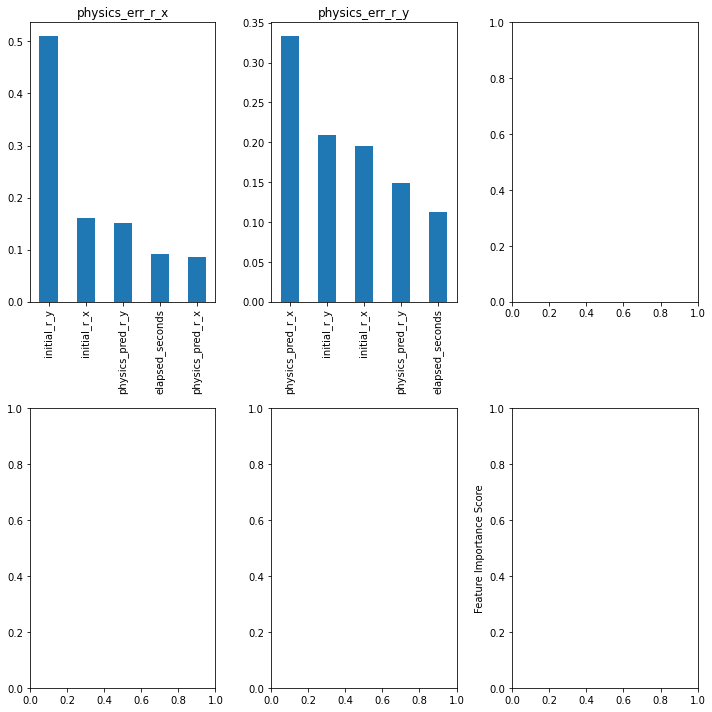

In [27]:
train_test_data = build_train_test_sets(space_data)

err_models = train_models(train_test_data, params={'tree_method': 'hist'})

eval_models(err_models, train_test_data)

plot_feat_impts(err_models, train_test_data)